In [1]:
using CairoMakie, CSV, DataFrames, Pipe, StatsKit

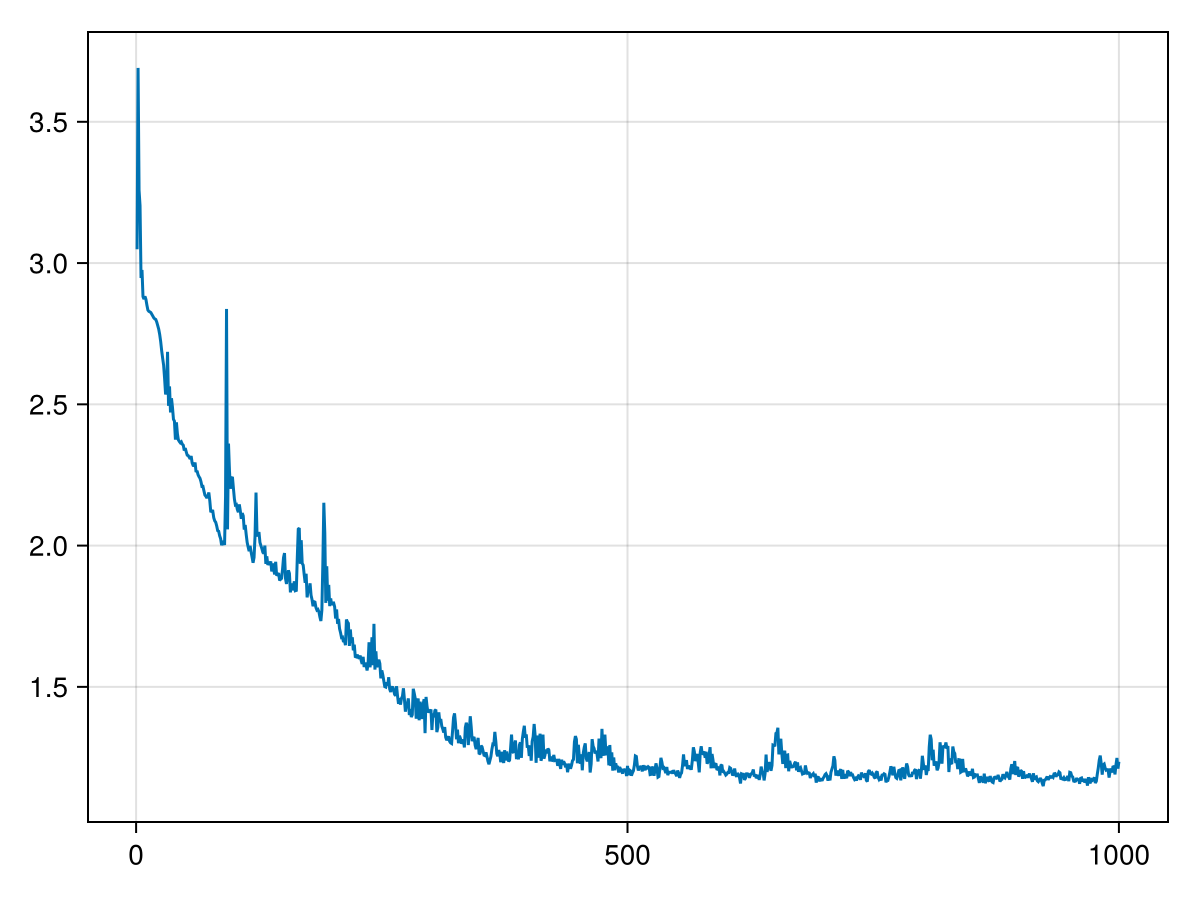

In [28]:
all_csv = [i for i in readdir() if occursin(".csv", i)]
all_df = [CSV.read(j, DataFrame, header=true) for j in all_csv]
long_df = outerjoin(all_df..., on=intersect([names(j) for j in all_df]...))
@pipe long_df |> select(_,[:itr,:loss]) |> sort(_,:itr) |> lines(eachcol(_)...)
ax = current_axis()
# xlims!(ax, 000,12000)
current_figure()

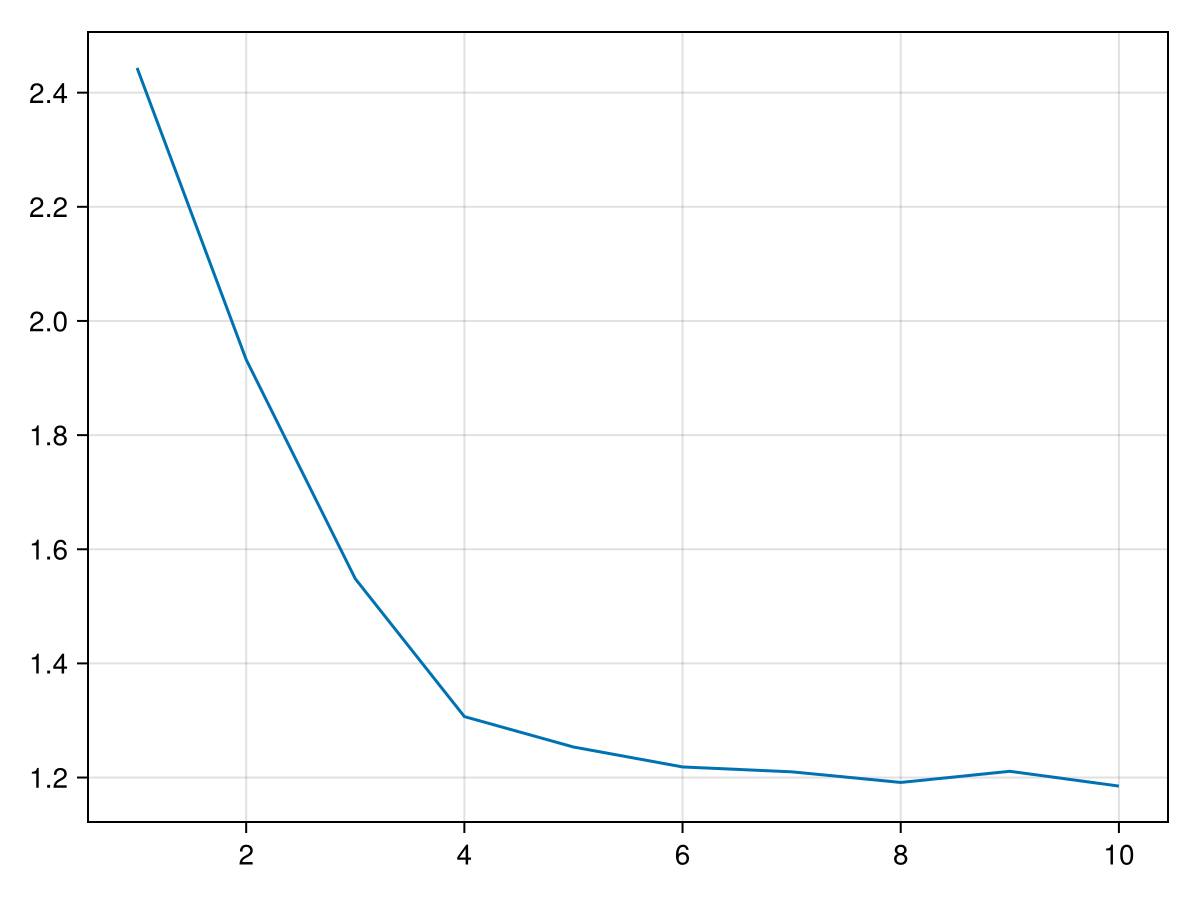

In [29]:
@pipe ceil.(long_df[:,:itr] / 100) |> 
    trunc.(Int64,_) |> 
    DataFrame(itr=long_df[:,:itr],index = _) |> 
    innerjoin(_, long_df, on=:itr) |> groupby(_,:index)  |> 
    combine(_, :loss => mean) |> lines(eachcol(_)...)


In [30]:
@pipe long_df |> filter(:itr => x -> x%100==1, _) |> sort(_, :loss)

10×3 DataFrame
 Row │ Column1  itr      loss    
     │ Int64    Float64  Float64 
─────┼───────────────────────────
   1 │       0    501.0  1.18702
   2 │       0    701.0  1.18943
   3 │       0    601.0  1.19082
   4 │       0    901.0  1.20124
   5 │       0    801.0  1.22827
   6 │       0    401.0  1.29273
   7 │       0    301.0  1.34736
   8 │       0    201.0  1.79703
   9 │       0    101.0  2.1439
  10 │       0      1.0  3.04876

In [31]:
print(size(long_df))

(1000, 3)

In [32]:
@pipe long_df |> sort(_, :loss) |> first(_,10)

10×3 DataFrame
 Row │ Column1  itr      loss    
     │ Int64    Float64  Float64 
─────┼───────────────────────────
   1 │      22    923.0  1.14874
   2 │      67    968.0  1.15035
   3 │      59    960.0  1.15682
   4 │      14    615.0  1.15793
   5 │      21    922.0  1.15839
   6 │      63    864.0  1.15882
   7 │      75    976.0  1.15978
   8 │      57    858.0  1.16007
   9 │      91    692.0  1.16099
  10 │      71    872.0  1.16134